# Notebook to compute the Coefficients of triaxial halos using the SCF method.

TO-DO:
------

1. Put comments.
2. Do the Analysis for T_{nlm}.
3. Identify the n l m.
4. Compare with the potentials of N-body simulations

In [1]:
%pylab inline
from SCF_analysis import *
import biff

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)

In [3]:
oblate_halo_data = np.loadtxt('../data/oblate_halo.txt')

x_ob = oblate_halo_data[:,0]
y_ob = oblate_halo_data[:,1]
z_ob = oblate_halo_data[:,2]

M_ob = oblate_halo_data[:,3]
xyz_ob = np.array([x_ob, y_ob, z_ob]).T

prolate_halo_data = np.loadtxt('../data/prolate_halo.txt')

x_pr = prolate_halo_data[:,0]
y_pr = prolate_halo_data[:,1]
z_pr = prolate_halo_data[:,2]

M_pr = prolate_halo_data[:,3]
xyz_pr = np.array([x_pr, y_pr, z_pr]).T


In [4]:
r_s = 40.85

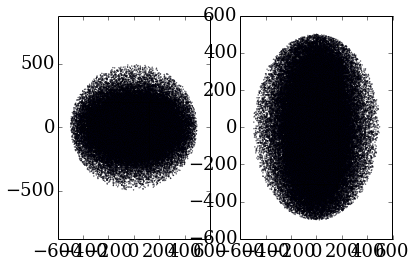

In [5]:
subplot(1, 2, 1)
scatter(x_ob, z_ob, s=0.1)
axis('equal')

subplot(1, 2, 2)
scatter(x_pr, z_pr, s=0.1)


In [5]:
Soblate, Toblate = biff.compute_coeffs_discrete(xyz_ob.astype(np.float64), M_ob.astype(np.float64), 5, 5, r_s)
Sprolate, Tprolate = biff.compute_coeffs_discrete(xyz_pr.astype(np.float64), M_pr.astype(np.float64), 5, 5, r_s)

In [6]:
index_ob = np.where(Soblate.flatten()!=0)[0]
Soblate_c = Soblate.flatten()[index_ob]

index_pr = np.where(Sprolate.flatten()!=0)[0]
Sprolate_c = Sprolate.flatten()[index_pr]

(-10, 130)

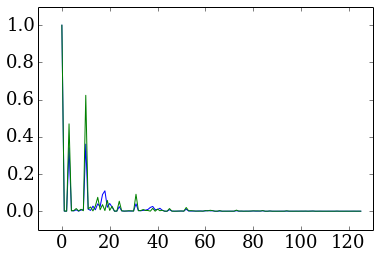

In [7]:
plot(np.abs(Soblate_c)/np.max(np.abs(Soblate_c)))
plot(np.abs(Sprolate_c)/np.max(np.abs(Sprolate_c)))
ylim(-0.1, 1.1)
xlim(-10, 130)

In [47]:
cov_mat_ob = np.loadtxt('cov_mat_oblate_5x5_test.txt') 
cov_mat_pr = np.loadtxt('cov_mat_prolate_5x5_test.txt') 

cov_mat_ob_S = cov_mat_ob[:,0]
cov_mat_ob_T = cov_mat_ob[:,1]

cov_mat_pr_S = cov_mat_pr[:,0]
cov_mat_pr_T = cov_mat_pr[:,1]

In [48]:
cov_matrix_ob_S = read_cov_mat(cov_mat_ob_S, 5, 5)
cov_matrix_pr_S = read_cov_mat(cov_mat_pr_S, 5, 5)



/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10


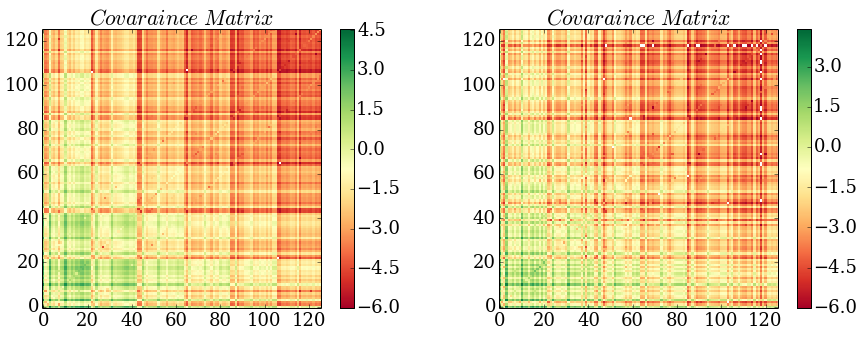

In [49]:
figure(figsize=(15, 5))

subplot(1, 2, 1)
plt.imshow(np.log10(np.abs(cov_matrix_ob_S)).T, origin='lower', interpolation='None', cmap = 'RdYlGn')
colorbar()
title('$Covaraince\ Matrix$')

subplot(1, 2, 2)
plt.imshow(np.log10(np.abs(cov_matrix_pr_S)).T, origin='lower', interpolation='None', cmap = 'RdYlGn')
colorbar()
title('$Covaraince\ Matrix$')

In [67]:
var_ob_S = variance(cov_matrix_ob_S)
var_pr_S = variance(cov_matrix_pr_S)

(-10, 130)

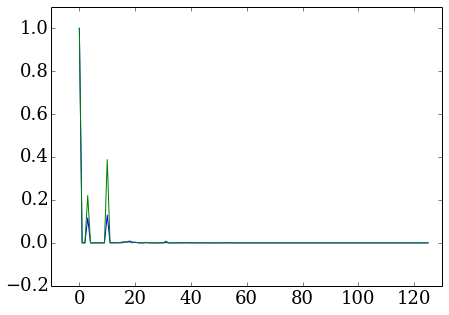

In [68]:
figsize(7,5)
plot(np.abs(var_ob_S)/np.max(np.abs(var_ob_S)))
plot(np.abs(var_pr_S)/np.max(np.abs(var_pr_S)))
ylim(-0.2, 1.1)
xlim(-10, 130)

In [52]:
b_ob = b(Soblate_c, var_ob_S)
b_pr = b(Sprolate_c, var_pr_S)

(-0.1, 1.2)

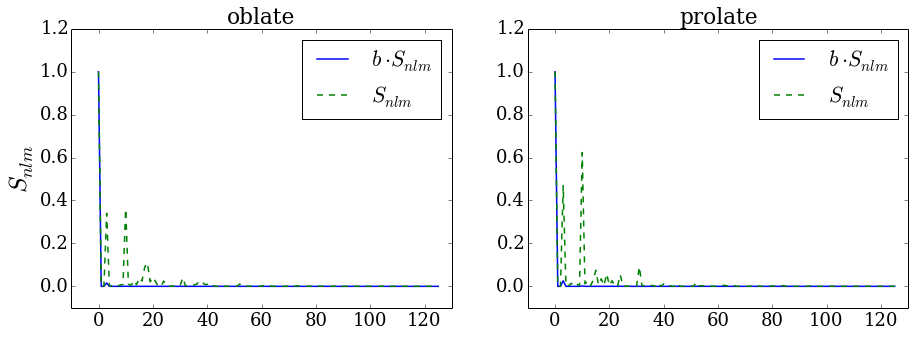

In [53]:
figure(figsize=(15, 5))

subplot(1, 2, 1)
title('oblate')
plot(np.abs(b_ob*Soblate_c)/np.max(np.abs(b_ob*Soblate_c)), lw=1.5, label='$b\cdot S_{nlm}$')
plot(np.abs(Soblate_c)/np.max(np.abs(Soblate_c)), ls='--', lw=1.5, label='$S_{nlm}$')
xlim(-10, 130)
ylim(-0.1, 1.2)
ylabel('$S_{nlm}$', fontsize=25)
legend()


subplot(1, 2, 2)
title('prolate')
plot(np.abs(b_pr*Sprolate_c)/np.max(np.abs(b_pr*Sprolate_c)), lw=1.5, label='$b\cdot S_{nlm}$')
plot(np.abs(Sprolate_c)/np.max(np.abs(Sprolate_c)), ls='--', lw=1.5, label='$S_{nlm}$')
legend()
xlim(-10, 130)
ylim(-0.1, 1.2)


In [54]:
o_m_pr, eigval_pr, T_pr = outter_matrix(Sprolate_c)
o_m_ob, eigval_ob, T_ob = outter_matrix(Soblate_c)

In [55]:
S_prolate_PCA = coeff_PCA(Sprolate_c, T_pr)
S_oblate_PCA = coeff_PCA(Soblate_c, T_ob)

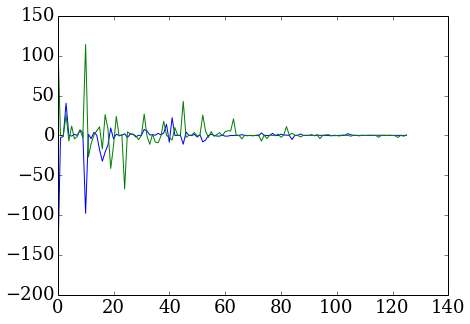

In [59]:
plot(S_oblate_PCA)
plot(S_prolate_PCA)

In [61]:
var_S_pr_PCA = var_PCA(cov_matrix_pr, T_pr.real)
var_S_ob_PCA = var_PCA(cov_matrix_ob, T_ob.real)

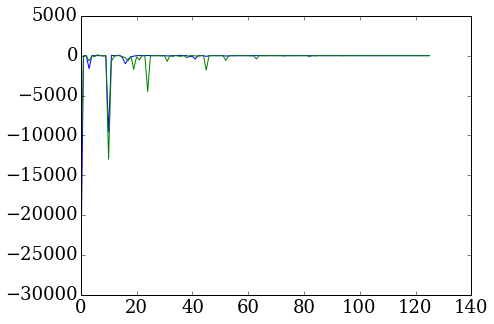

In [62]:
plot(var_S_ob_PCA)
plot(var_S_pr_PCA)

In [69]:
b_ob_PCA = b(S_oblate_PCA, var_S_ob_PCA)
b_pr_PCA = b(S_prolate_PCA, var_S_pr_PCA)

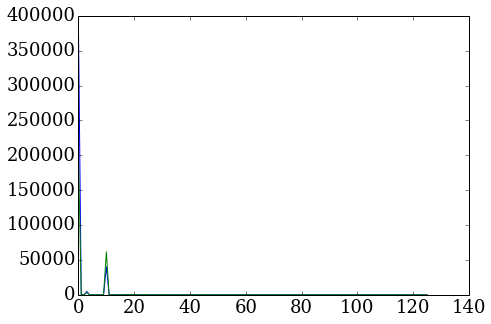

In [70]:
plot(b_ob_PCA)
plot(b_pr_PCA)

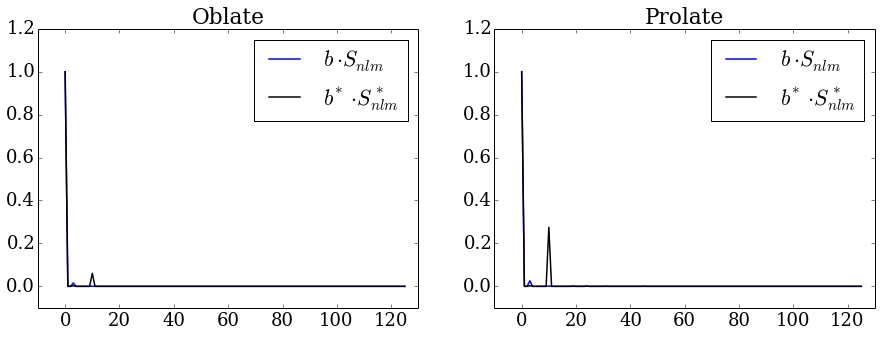

In [93]:
figure(figsize=(15,5))

subplot(1, 2, 1)
title('Oblate')
plot(np.abs(b_ob*Soblate_c)/np.max(np.abs(b_ob*Soblate_c)), lw=1.5, c='b', label='$b\cdot S_{nlm}$')
plot(np.abs(b_ob_PCA*S_oblate_PCA)/np.max(np.abs(b_ob_PCA*S_oblate_PCA)), c='k', lw=1.5, label='$b^{*}\cdot S^*_{nlm}$')
xlim(-10, 130)
ylim(-0.1, 1.2)
legend()

subplot(1, 2, 2)
title('Prolate')
plot(np.abs(b_pr*Sprolate_c)/np.max(np.abs(b_pr*Sprolate_c)), lw=1.5, label='$b\cdot S_{nlm}$')
plot(np.abs(b_pr_PCA*S_prolate_PCA)/np.max(np.abs(b_pr_PCA*S_prolate_PCA)), c='k', lw=1.5, label='$b^*\cdot S^*_{nlm}$')
xlim(-10, 130)
ylim(-0.1, 1.2)
legend()